In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

D:\LUTFI\Anacnda\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
df = pd.read_excel('Real_estate_valuation _data_set.xlsx')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.columns = ['No', 'Date', 'Age', 'Distance_MRT', 'Total_Sotres', 'Latitude', 'longitude', 'price']
df.head()

,No,Date,Age,Distance_MRT,Total_Sotres,Latitude,longitude,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            414 non-null    int64  
 1   Date          414 non-null    float64
 2   Age           414 non-null    float64
 3   Distance_MRT  414 non-null    float64
 4   Total_Sotres  414 non-null    int64  
 5   Latitude      414 non-null    float64
 6   longitude     414 non-null    float64
 7   price         414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['No', 'Date', 'price'], axis=1),
    df['price'],
    test_size=  0.2,
    random_state= 1)

for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

X_train.shape, X_test.shape

((331, 5), (83, 5))

In [7]:
target = 'price'

In [8]:
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler())
])

In [9]:
lr = LinearRegression()

In [10]:
model_rfr = Pipeline(steps=[
    ('preprocessor_numerik', preprocessor_numerik),
    ('lr', LinearRegression())
])

In [11]:
model_rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_numerik',
                 Pipeline(steps=[('imputasi', SimpleImputer()),
                                 ('scaling', StandardScaler())])),
                ('lr', LinearRegression())])

In [12]:
model_rfr.predict(X_train)

array([42.36886682, 45.64027105, 52.29266724, 47.85322975, 36.37229111,
       48.6702964 , 14.93141372, 33.87830336, 50.24625987, 40.83238223,
       30.49859064, 48.37004246, 41.02486147, 30.02306706, 42.31075147,
       48.68694663, 43.018887  , 33.55347608, 46.22563127, 30.17706976,
       33.50593387, 39.85433842, 42.16108976, 48.58127858, 34.80094567,
       38.57058392, 47.18117225, 43.19310668, 52.31761086, 48.39034417,
       41.99035299, 30.55918299, 46.41177644, 46.74944722, 42.26086423,
       41.74468415, 15.12079501, 43.30531335, 15.25954788, 38.78936601,
       41.59188631, 41.71778768, 43.15499811, 45.4240889 , 46.17574403,
       47.12788362, 40.15448785, 38.5988199 , 48.63116581, 44.90988295,
       46.61340685, 47.80869225, 41.33640095, 42.23592061, 42.31075147,
       43.18050194, 52.24278   , 32.59440108, 12.11104337, 41.57404166,
       25.52390374, 43.12497981, 48.58127858, 38.63804119, 34.88185988,
       48.4199297 , 50.24625987, 44.30833569, 50.59052451, 43.01

In [13]:
print(model_rfr['lr'].intercept_)
print(model_rfr['lr'].coef_)

38.71299093655648
[-2.85545772 -5.80314009  3.25790289  2.9053199  -0.525551  ]


In [14]:
print(model_rfr['preprocessor_numerik'].get_feature_names_out())

['Age' 'Distance_MRT' 'Total_Sotres' 'Latitude' 'longitude']


In [15]:
# Looping untuk mencetak persamaan regresi linear
for i,j in enumerate(model_rfr['lr'].coef_):
    if i == 0:
        print(str(target),'=',model_rfr['lr'].intercept_,'+',model_rfr['lr'].coef_[i],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[i],'+')
    elif i != len(model_rfr['lr'].coef_)-1:
        print(model_rfr['lr'].coef_[i],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[i],'+')
    else:
        print(model_rfr['lr'].coef_[i],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[i])

price = 38.71299093655648 + -2.8554577169465 * Age +
-5.803140091732102 * Distance_MRT +
3.2579028917683615 * Total_Sotres +
2.905319902108692 * Latitude +
-0.5255509950918564 * longitude


In [16]:
# Menulis secara runut model regresi secara manual
print('price = ', model_rfr['lr'].intercept_,'+',
      model_rfr['lr'].coef_[0],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[0],'+',
      model_rfr['lr'].coef_[1],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[1],'+',
      model_rfr['lr'].coef_[2],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[2],'+',
      model_rfr['lr'].coef_[3],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[3],'+',
      model_rfr['lr'].coef_[4],'*',model_rfr['preprocessor_numerik'].get_feature_names_out()[4])

price =  38.71299093655648 + -2.8554577169465 * Age + -5.803140091732102 * Distance_MRT + 3.2579028917683615 * Total_Sotres + 2.905319902108692 * Latitude + -0.5255509950918564 * longitude


Dengan melihay rumus diatas kita, para pebisnis Real estate bisa menggunakan rumus diatas dengancara mengisi setiap featuresnya.

<br>

### Evaluasi Model

In [17]:
#memprediksi X_train dan membandingkannya dengan y_train
predik_train = model_rfr.predict(X_train)

In [18]:
#melihat hasil prediksi training 
predik_train = pd.DataFrame(predik_train, columns=[target])
predik_train.head()

,price
0,42.368867
1,45.640271
2,52.292667
3,47.853230
4,36.372291


In [19]:
#Membandingkan 2 hasil prediksi dan asli
compareXy_train = pd.DataFrame(np.column_stack((predik_train, pd.DataFrame(y_train), abs(predik_train - pd.DataFrame(y_train)))), columns=['Prediksi X_train', 'Asli', 'Eror'])
compareXy_train.head()
                                          

,Prediksi X_train,Asli,Eror
0,42.368867,37.4,4.968867
1,45.640271,51.8,6.159729
2,52.292667,58.1,5.807333
3,47.853230,49.5,1.646770
4,36.372291,30.6,5.772291


kolom bertuliskan eror merupakan selisih antara prediksi ke nilai asli 

In [20]:
compareXy_train.describe()

,Prediksi X_train,Asli,Eror
count,331.000000,331.000000,331.000000
mean,38.712991,38.712991,6.468697
std,10.125296,13.814414,6.807759
min,2.605005,7.600000,0.025631
25%,33.166566,28.450000,2.395571
50%,41.447863,39.300000,5.058957
75%,45.981466,47.300000,8.315330
max,55.028241,117.500000,75.509647


nilai MAE adalah 6.03

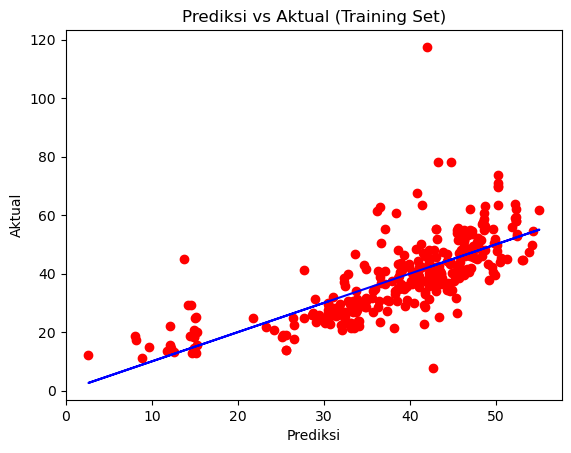

In [21]:
plt.scatter(predik_train, y_train, color = 'red')
plt.plot(predik_train, model_rfr.predict(X_train), color = 'blue')
plt.title('Prediksi vs Aktual (Training Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

membandingkan prediksi X_train dan y_train tampaknya sangat bagus, namun perlu menghitung nilai eror sekaligus coeficient.

<br>

### Menghitung *Metrics* di *Training Set*

In [22]:
# Menghitung nilai error (MAE, MSE, RMSE) di Training Set
from sklearn import metrics
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_train, predik_train)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_train, predik_train)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_train, predik_train))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_train, predik_train)))

MAE = 6.47
MSE = 88.05
RMSE = 9.38
R2 = 0.54


<br>

### Evaluasi di Test Set

In [23]:
predik_test = model_rfr.predict(X_test)

In [24]:
predik_test = pd.DataFrame(predik_test, columns=[target])
predik_test.head()

,price
0,33.079962
1,47.808692
2,22.113738
3,15.130963
4,44.625942


In [25]:
compareXX_test = pd.DataFrame(np.column_stack((predik_test, pd.DataFrame(y_test), abs(predik_test - pd.DataFrame(y_test)))), columns=['Prediksi X_test', 'Asli', 'Eror'])
compareXX_test

,Prediksi X_test,Asli,Eror
0,33.079962,27.3,5.779962
1,47.808692,54.4,6.591308
2,22.113738,22.0,0.113738
3,15.130963,11.6,3.530963
4,44.625942,45.4,0.774058
...,...,...,...
78,41.626092,33.1,8.526092
79,46.125857,59.6,13.474143
80,44.362550,40.8,3.562550
81,43.018887,52.2,9.181113


In [26]:
compareXX_test.describe()

,Prediksi X_test,Asli,Eror
count,83.000000,83.000000,83.000000
mean,37.118491,35.057831,5.380155
std,11.005341,12.395043,4.084077
min,12.275686,11.600000,0.113738
25%,33.211700,23.800000,2.231576
50%,40.503114,36.900000,4.200462
75%,44.625942,42.900000,8.163311
max,52.588151,59.600000,17.777806


Nimali MAE di test set adalah 6.5

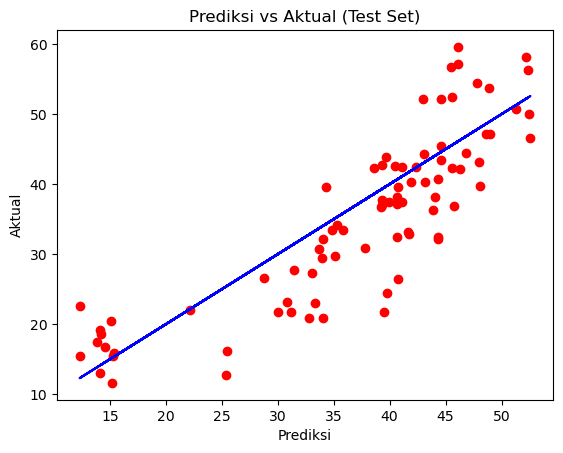

In [27]:
# Visualisasi hasil Test Set
plt.scatter(predik_test, y_test, color = 'red')
plt.plot(predik_test, model_rfr.predict(X_test), color = 'blue')
plt.title('Prediksi vs Aktual (Test Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

dari visual diatas, terlihat jelas bahwa nilai prediksi test set dngan nilai asli hapir sama, itu ditandai dengan titik merah sangat dekat dengan garis biru, namun ada juga yang sangat jauh, itu menandakan oulier

<br>

Menghitung Metric hasil dari test set

In [28]:
# Menghitung nilai error (MAE, MSE, RMSE) di Test Set
print('MAE = {0:.2f}'.format(metrics.mean_absolute_error(y_test, predik_test)))           # MAE adalah nilai error rata-rata seperti yang ada di tabel banding_train
print('MSE = {0:.2f}'.format(metrics.mean_squared_error(y_test, predik_test)))            # penulisan {0:.2f} adalah untuk menuliskan 2 angka di belakang koma
print('RMSE = {0:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predik_test))))
print('R2 = {0:.2f}'.format(metrics.r2_score(y_test, predik_test)))

MAE = 5.38
MSE = 45.42
RMSE = 6.74
R2 = 0.70


bisa dilihat dari hasil X_train dan X_test dari 0.65 dan 0.70 sangat rendah hampir 50% dari sini peneliti masih kurang puas dengan hasil, untuk itu peneliti akan mencoba lagi dengan pemilihan model terbaik, cross validasi dan hyper paramter tuning.

<br>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['No', 'Date', 'price'], axis=1),
    df['price'],
    test_size=  0.2,
    random_state= 1)

for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

X_train.shape, X_test.shape

((331, 5), (83, 5))

In [30]:
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler())
])

<br>

In [31]:
# Model regresi Linear
linreg = LinearRegression()

# Pipeline model regresi linear
mod_linreg = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('linear', linreg)
])

# Hyperparameter tuning Linear Regression
param_linreg = {}

<br>

In [32]:
# Model regresi Lasso
lasso = Lasso(alpha=0.001, random_state=0)

# Pipeline model regresi lasso
mod_lasso = Pipeline([
    ('preprocessor_numerikg', preprocessor_numerik),
    ('lasso', lasso)
])

# Hyperparameter tuning regresi Lasso
param_lasso = {'lasso__alpha': np.arange(0.01, 1.0, 0.01)}

<br>

In [33]:
# Model regresi Ridge
ridge = Ridge(alpha=0.5)

# Pipeline model regresi Ridge
mod_ridge = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('ridge', ridge)
])

# Hyperparameter tuning regresi Lasso
param_ridge = {'ridge__alpha': np.arange(0.01, 1.0, 0.01),
              'ridge__solver': ['auto','svd', 'lsqr']
              }

<br>

In [34]:
# Model regresi ElasticNet
enet = ElasticNet(random_state=0)

# Pipeline model regresi Elastic Net
mod_enet = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('enet', enet)
])

# Hyperparameter tuning Elastic Net
param_enet = {
    'enet__alpha': [0.01, 0.1, 0.5],
    'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 1]
    }

<br>

In [35]:
# Model regresi Decision Tree
dt = DecisionTreeRegressor(random_state=0)

# Pipeline model regresi Decision Tree
mod_dt = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('dt', dt)
])

# Hyperparameter tuning regresi Decision Tree
param_dt = {
    'dt__splitter': ['best','random'],
    'dt__max_depth': np.arange(1,10), 
    'dt__min_samples_split': np.arange(2,10),
    'dt__min_samples_leaf': np.arange(1,5)
    }

<br>

In [36]:
# Model regresi Random Forest
rf = RandomForestRegressor(random_state=0)

# Pipeline model regresi Random Forest
mod_rf = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('rf', rf)
])

# Hyperparameter tuning regresi Random Forest
param_rf = {
    'rf__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
    'rf__min_samples_split': np.arange(2,10),
    'rf__min_samples_leaf': np.arange(1,5)
    }

<br>

In [37]:
# Model regresi Gradient Boosting
gboost = GradientBoostingRegressor(loss='huber',criterion='squared_error',random_state=0)

# Pipeline model regresi Gradient Boosting
mod_gboost = Pipeline([
    ('preprocessor_numerik', preprocessor_numerik),
    ('gboost', gboost)
    ])

# Hyperparameter tuning Gradient Boosting
param_gboost = {
    'gboost__n_estimators':[200, 250, 350, 400], #default 100
    'gboost__learning_rate':[0.75, 0.1, 1.25], #default 0.1
    'gboost__max_depth':[2], #default 3
    'gboost__min_samples_split':[5, 6, 7, 8], #default 2
    'gboost__min_samples_leaf':[1, 2, 3] # default 1
    }

Sekarang kita akan mentraining semua model di atas dan mengevaluasinya langsung menggunakan 3-fold cross validation.

In [38]:
# Model training dengan cross validation
daftar_model = [mod_linreg, mod_lasso, mod_ridge, mod_enet, mod_dt, mod_rf, mod_gboost]
daftar_nama_model = ['linreg', 'lasso', 'ridge', 'elastic', 'dt', 'rf', 'gboost']
mean_mae = []
mean_r2 = []
std_mae = []
std_r2 = []
test_score_mae = []
test_score_r2 = []

# Setting parameter jika permasalahannya adalah klasifikasi
# skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
# tentukan cv = skf jika ingin stratified cross validation

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor MAE dan R2
    cv_mae = -cross_val_score(i, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_r2 = cross_val_score(i, X_train, y_train, cv=3, scoring='r2', verbose=1, n_jobs=-1) # n_jobs=-1 artinya kita gunakan semua prerocessor
    
    # Menghitung nilai rata-rata MAE dan R2 dan menambahkannya ke variabel mean_mae dan mean_r2
    mean_mae.append(round(cv_mae.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_r2.append(round(cv_r2.mean(),2))
    
    # Menghitung nilai standar deviasi MAE dan R2 dan menambahkannya ke variabel std_mae dan std_r2
    std_mae.append(round(cv_mae.std(),2))
    std_r2.append(round(cv_r2.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata MAE dan R2 di test set dan menambahkannya ke variabel test_score_mae dan test_core_r2
    test_score_mae.append(round(mean_absolute_error(y_test, i_predict),2))
    test_score_r2.append(round(r2_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

In [39]:
# Membuat DataFrame
cv_mae = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_mae, 'std':std_mae, 'Test_Score':test_score_mae})
cv_r2 = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_r2, 'std':std_r2, 'Test_Score':test_score_r2})

In [40]:
cv_mae

,model,Train_Mean,std,Test_Score
0,linreg,6.85,0.88,5.38
1,lasso,6.85,0.88,5.38
2,ridge,6.85,0.88,5.38
3,elastic,7.19,1.11,5.80
4,dt,6.52,1.11,5.60
5,rf,5.07,0.57,5.37
6,gboost,5.02,0.58,5.25


In [41]:
# Mengurutkan skor dari kecil ke besar
cv_mae_urut = cv_mae.sort_values(by=['Train_Mean','Test_Score'],  ignore_index=True)
cv_mae_urut

,model,Train_Mean,std,Test_Score
0,gboost,5.02,0.58,5.25
1,rf,5.07,0.57,5.37
2,dt,6.52,1.11,5.60
3,linreg,6.85,0.88,5.38
4,lasso,6.85,0.88,5.38
5,ridge,6.85,0.88,5.38
6,elastic,7.19,1.11,5.80


In [42]:
cv_r2

,model,Train_Mean,std,Test_Score
0,linreg,0.49,0.11,0.70
1,lasso,0.49,0.11,0.70
2,ridge,0.49,0.11,0.70
3,elastic,0.47,0.12,0.66
4,dt,0.38,0.24,0.57
5,rf,0.67,0.06,0.61
6,gboost,0.66,0.06,0.65


In [43]:
# Mengurutkan skor dari besar ke kecil
cv_r2_urut = cv_r2.sort_values(by=['Train_Mean','Test_Score'], ascending=False, ignore_index=True)
cv_r2_urut

,model,Train_Mean,std,Test_Score
0,rf,0.67,0.06,0.61
1,gboost,0.66,0.06,0.65
2,linreg,0.49,0.11,0.70
3,lasso,0.49,0.11,0.70
4,ridge,0.49,0.11,0.70
5,elastic,0.47,0.12,0.66
6,dt,0.38,0.24,0.57


Bisa dilihat pada skor di atas bahwa model terbaik berdasarkan skor MAE terendah adalah menggunakan gradient boost, namun untuk R2 tertinggi oleh random forest.

Selain itu kita bisa lihat juga performa di *test set* lebih baik daripada di *training set*, artinya modelnya sudah fit.

<br>

untuk lebih lebih optimal menggunakan hyper parameter tuning

In [44]:
# Model training dengan GridSearchCV
daftar_model = [mod_linreg, mod_lasso, mod_ridge, mod_enet, mod_dt, mod_rf, mod_gboost]
daftar_nama_model = ['linreg', 'lasso', 'ridge', 'elastic', 'dt', 'rf', 'gboost']
daftar_param_model = [param_linreg, param_lasso, param_ridge, param_enet, param_dt, 
                     param_rf, param_gboost]

# Nilai yang akan diisikan
mae_tuning = []
mae_tuning_test = []
r2_tuning = []
r2_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
    daftar_model[i],
    daftar_param_model[i],
    cv=5,
    verbose=1,
    n_jobs=-1
    ).fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=[target])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=[target])

    # Mencatat skor MAE training dan test set
    mae_tuning.append(mean_absolute_error(y_train, pred_train))
    mae_tuning_test.append(mean_absolute_error(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    r2_tuning.append(r2_score(y_train, pred_train))
    r2_tuning_test.append(r2_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 99 candidates, totalling 495 fits
Fitting 5 folds for each of 297 candidates, totalling 1485 fits
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [45]:
# Membuat DataFrame sekaligus kita urutkan
grid_mae = pd.DataFrame({'model':daftar_nama_model, 'Training':mae_tuning, 'Testing':mae_tuning_test})
grid_mae_urut = grid_mae.sort_values(by='Testing',  ignore_index=True)

grid_r2 = pd.DataFrame({'model':daftar_nama_model, 'Training':r2_tuning, 'Testing':r2_tuning_test})
grid_r2_urut = grid_r2.sort_values(by='Testing', ascending=False, ignore_index=True)

In [46]:
# Melihat performa tuning berdasarkan MAE
grid_mae_urut

,model,Training,Testing
0,rf,3.173157,4.840727
1,dt,4.659948,5.122358
2,gboost,3.000884,5.129114
3,elastic,6.495830,5.367278
4,lasso,6.504837,5.377494
5,ridge,6.469763,5.378675
6,linreg,6.468697,5.380155


In [47]:
# Melihat performa tuning berdasarkan R2
grid_r2_urut

,model,Training,Testing
0,rf,0.852686,0.725545
1,elastic,0.535994,0.704105
2,lasso,0.536011,0.702151
3,ridge,0.537212,0.701203
4,linreg,0.537218,0.700731
5,gboost,0.829408,0.700595
6,dt,0.723694,0.688717


Dari model di atas dapat kita lihat bahwa model terbaik adalah menggunakan random forest yang menemapti urutan 1 pada nilai r2 dan mae.

Sekarang kita bisa menyimpam parameter dan estimator dari setiap model dalam format DataFrame.

In [48]:
level_parameter = pd.DataFrame({'model': daftar_nama_model, 'Param' :best_param})
level_parameter

,model,Param
0,linreg,{}
1,lasso,{'lasso__alpha': 0.23}
2,ridge,"{'ridge__alpha': 0.99, 'ridge__solver': 'svd'}"
3,elastic,"{'enet__alpha': 0.1, 'enet__l1_ratio': 0.5}"
4,dt,"{'dt__max_depth': 7, 'dt__min_samples_leaf': 2..."
5,rf,"{'rf__criterion': 'squared_error', 'rf__min_sa..."
6,gboost,"{'gboost__learning_rate': 0.1, 'gboost__max_de..."


In [49]:
# Estimator terbaik dari model terbaik
level_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
level_estimator

,model,Param
0,linreg,"((SimpleImputer(), StandardScaler()), LinearRe..."
1,lasso,"((SimpleImputer(), StandardScaler()), Lasso(al..."
2,ridge,"((SimpleImputer(), StandardScaler()), Ridge(al..."
3,elastic,"((SimpleImputer(), StandardScaler()), ElasticN..."
4,dt,"((SimpleImputer(), StandardScaler()), Decision..."
5,rf,"((SimpleImputer(), StandardScaler()), (Decisio..."
6,gboost,"((SimpleImputer(), StandardScaler()), ([Decisi..."


In [50]:
# Parameter terbaik Random Forest Regression (model kelima)
level_parameter['Param'][5]

{'rf__criterion': 'squared_error',
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 2}

In [51]:
level_estimator['Param'][5]

Pipeline(steps=[('preprocessor_numerik',
                 Pipeline(steps=[('imputasi', SimpleImputer()),
                                 ('scaling', StandardScaler())])),
                ('rf',
                 RandomForestRegressor(min_samples_leaf=3, random_state=0))])

In [52]:
# Kita gabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best_param'
model_best_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param, 'Testing':r2_tuning_test})
model_best_param = model_best_param.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_param

,model,Param,Testing
0,rf,"{'rf__criterion': 'squared_error', 'rf__min_sa...",0.725545
1,elastic,"{'enet__alpha': 0.1, 'enet__l1_ratio': 0.5}",0.704105
2,lasso,{'lasso__alpha': 0.23},0.702151
3,ridge,"{'ridge__alpha': 0.99, 'ridge__solver': 'svd'}",0.701203
4,linreg,{},0.700731
5,gboost,"{'gboost__learning_rate': 0.1, 'gboost__max_de...",0.700595
6,dt,"{'dt__max_depth': 7, 'dt__min_samples_leaf': 2...",0.688717


In [53]:
# menggabungkan semua dan urutkan berdasarkan nilai R2 di test set sebagai 'model_best_estimator'
model_best_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':r2_tuning_test})
model_best_estimator = model_best_estimator.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best_estimator

,model,Param,Testing
0,rf,"((SimpleImputer(), StandardScaler()), (Decisio...",0.725545
1,elastic,"((SimpleImputer(), StandardScaler()), ElasticN...",0.704105
2,lasso,"((SimpleImputer(), StandardScaler()), Lasso(al...",0.702151
3,ridge,"((SimpleImputer(), StandardScaler()), Ridge(al...",0.701203
4,linreg,"((SimpleImputer(), StandardScaler()), LinearRe...",0.700731
5,gboost,"((SimpleImputer(), StandardScaler()), ([Decisi...",0.700595
6,dt,"((SimpleImputer(), StandardScaler()), Decision...",0.688717


<br>

## Menggunakan Model Terbaik

mentraining parameter model terbaik denga dataset penuh

### memanggil data awal proses tadi

In [54]:
df.head()

,No,Date,Age,Distance_MRT,Total_Sotres,Latitude,longitude,price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [55]:
# Kita bagi variabel independen dan dependen-nya
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [56]:
X.head()

,Age,Distance_MRT,Total_Sotres,Latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [57]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

<br>

### Training Ulang Model Akhir Dengan Dataset Utuh

In [58]:
model_akhir_otomastis = model_best_estimator['Param'][0].fit(X,y)

In [59]:
model_akhir_otomastis

Pipeline(steps=[('preprocessor_numerik',
                 Pipeline(steps=[('imputasi', SimpleImputer()),
                                 ('scaling', StandardScaler())])),
                ('rf',
                 RandomForestRegressor(min_samples_leaf=3, random_state=0))])

In [60]:
# Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
pred_train_otomatis = pd.DataFrame(model_akhir_otomastis.predict(X_train), columns=[target])
pred_test_otomatis = pd.DataFrame(model_akhir_otomastis.predict(X_test), columns=[target])

In [61]:
# Membandingkan 2 numpy array (kita gunakan np.column_stack untuk menggabungkan kedua array ini)
banding_train_otomatis = pd.DataFrame(np.column_stack((pred_train_otomatis, pd.DataFrame(y_train), abs(pred_train_otomatis - pd.DataFrame(y_train)))), columns=['Prediksi', 'Asli', 'Error'])
banding_train_otomatis.head()

,Prediksi,Asli,Error
0,37.956955,37.4,0.556955
1,50.387571,51.8,1.412429
2,58.550618,58.1,0.450618
3,48.731643,49.5,0.768357
4,28.899963,30.6,1.700037


In [62]:
banding_train_otomatis.describe()

,Prediksi,Asli,Error
count,331.000000,331.000000,331.000000
mean,38.544127,38.712991,3.134446
std,12.090960,13.814414,4.203389
min,14.603233,7.600000,0.001991
25%,27.909553,28.450000,0.904570
50%,39.585019,39.300000,2.021594
75%,47.106554,47.300000,3.943572
max,67.117270,117.500000,50.743411


In [63]:

banding_test_otomatis = pd.DataFrame(np.column_stack((pred_test_otomatis, pd.DataFrame(y_test), abs(pred_test_otomatis - pd.DataFrame(y_test)))), columns=['Prediksi', 'Asli', 'Error'])
banding_test_otomatis.head()

,Prediksi,Asli,Error
0,25.365133,27.3,1.934867
1,49.588137,54.4,4.811863
2,23.537696,22.0,1.537696
3,15.091492,11.6,3.491492
4,53.596848,45.4,8.196848


In [64]:
banding_test_otomatis.describe()

,Prediksi,Asli,Error
count,83.000000,83.000000,83.000000
mean,36.250759,35.057831,2.812076
std,12.365585,12.395043,2.521332
min,15.091492,11.600000,0.009281
25%,26.505429,23.800000,0.901083
50%,37.825870,36.900000,1.934867
75%,45.366317,42.900000,4.188026
max,59.661956,59.600000,10.897020


In [65]:
# Melihat skor MAE setelah tuning
print(f'Error train set {mean_absolute_error(y_train, pred_train_otomatis):.3f}')
print(f'Error test set {mean_absolute_error(y_test, pred_test_otomatis):.3f}')

Error train set 3.134
Error test set 2.812


In [66]:
# Melihat skor R2 setelah tuning
print(f'R2 train set = {r2_score(y_train, pred_train_otomatis):.3f}')
print(f'R2 test set = {r2_score(y_test, pred_test_otomatis):.3f}')

R2 train set = 0.856
R2 test set = 0.907


In [67]:
# Melihat R2 dengan menggunakan method 'score'
print(round(model_akhir_otomastis.score(X_train, y_train),3))
print(round(model_akhir_otomastis.score(X_test, y_test),3))

0.856
0.907


<br>

### Menyimpan Model

In [68]:
import pickle

In [69]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_akhir_otomastis, open('model_regresi_realestate.pkl', 'wb'))

In [70]:
best_model = pickle.load(open('model_regresi_realestate.pkl', 'rb'))

In [71]:
prediksi = best_model.predict(X_test)

In [72]:
prediksi

array([25.36513312, 49.58813707, 23.53769632, 15.09149192, 53.5968484 ,
       26.62990923, 24.92314482, 33.47161876, 38.99839109, 18.41769968,
       17.40928084, 37.14860224, 23.57370049, 44.16059913, 54.79656104,
       22.36188506, 53.5968484 , 43.39913588, 27.41186374, 48.52032763,
       46.1403558 , 23.97747107, 37.8747926 , 59.12870727, 51.22921429,
       26.3939    , 29.4381557 , 51.67359258, 47.2277215 , 17.16195631,
       30.20013785, 37.47691944, 41.48889206, 50.94102314, 46.70533535,
       17.7374671 , 37.82586962, 37.58559887, 42.259326  , 17.1534004 ,
       39.74715667, 16.25023175, 59.66195558, 30.57614654, 29.44505325,
       26.61695768, 22.80101331, 42.93427837, 38.04899524, 37.82812385,
       17.7374671 , 55.19701974, 43.05059957, 16.0955438 , 49.28513763,
       40.71226944, 53.5968484 , 38.95569908, 36.69922615, 40.08712758,
       15.79309127, 34.49000397, 27.89192287, 17.7374671 , 41.94553939,
       37.25059571, 51.28433846, 41.46778748, 16.12176154, 41.67

In [73]:
prediksi = pd.DataFrame(prediksi, columns=[target])
prediksi

,price
0,25.365133
1,49.588137
2,23.537696
3,15.091492
4,53.596848
...,...
78,34.039634
79,51.479448
80,43.485848
81,49.820510
